<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: An introduction to NLP and cleaning text
© ExploreAI Academy

In this notebook, we will explore text-cleaning and feature-extraction techniques in NLP. We'll use the NLTK library to preprocess unstructured text data, preparing it for machine learning tasks. By using examples, we'll work through the steps of cleaning text data and extracting meaningful features.

## Learning objectives

By the end of this notebook, you should be able to:

* Gain a basic understanding of text-cleaning techniques.
* Implement text-cleaning steps such as removing URLs, converting text to lowercase, and removing punctuation.
* Understand the concept of tokenisation and its importance in text processing.
* Apply stemming and lemmatization to reduce words to their root forms.
* Demonstrate the removal of stop words and their impact on text analysis.


## Introduction

This tutorial introduces basic concepts in natural language processing, and in particular, common techniques for handling, processing, and preparing unstructured text data for use with machine learning models. The concepts introduced here are also useful for text analysis, so please feel free to do more research and see what can be achieved using the MBTI dataset.

Before diving in, let's acquire the necessary data and the primary library we'll be utilising.

## NLTK

NLTK – Natural Language Toolkit – is a widely used library for building Python programs to work with human language data. It provides interfaces to numerous corpora and lexical resources, such as WordNet, along with a suite of text-processing libraries for classification, tokenisation, stemming, tagging, parsing, and semantic reasoning. Additionally, NLTK offers wrappers for various NLP libraries and features an active discussion forum.

Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike. NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open-source, community-driven project.

Let's import `nltk` and other packages to get started.

In [1]:
# Import necessary libraries
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set_theme()

### Downloading NLTK corpora


Several text processing methods introduced in the NLTK require accessing predefined language resources, such as [stop word lists](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/). For instance, when identifying stop words within a text, NLTK relies on a [corpus](https://en.wikipedia.org/wiki/Text_corpus) containing such words. This corpus serves as a reference for the lookup operation during text processing. To ensure seamless execution of NLTK methods, it's essential to download the required corpora beforehand. Failure to do so may result in lookup errors during tokenisation and stop word removal processes. Fortunately, we can pre-emptively address these issues by downloading the necessary corpora using the NLTK downloader tool.

In [2]:
# Download NLTK corpora
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

You should see a pop-up box similar to the one shown below.

Note: The box might appear in the background, in which case you can use alt + tab to switch to the downloader window.

<img src="https://github.com/Explore-AI/Pictures/blob/master/nltk_downloader.png?raw=true" width=50%/> 

Use it to navigate to the items we need to download:

* Stopwords corpus (under the Corpora tab)
* Punkt tokenizer models (under the Models tab)

In [20]:
# or we can download directly, i.e.
nltk.download(['punkt','stopwords', 'punkt_tab'])

[nltk_data] Downloading package punkt to /home/ahmed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/ahmed/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

If the download was successful, then the following import should work:

In [4]:
from nltk.corpus import stopwords

Although we'll explore stop words in greater detail later in this train, it won't hurt to take a quick look at what we've downloaded:

In [5]:
# Get the list of English stop words
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## The MBTI dataset

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides people into one of 16 distinct personality types across 4 axes:

    Introversion (I) – Extroversion (E)
    Intuition (N) – Sensing (S)
    Thinking (T) – Feeling (F)
    Judging (J) – Perceiving (P)

[(More can be learned about what these mean here.)](https://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/home.htm)

So, for example, someone who prefers introversion, intuition, thinking, and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality-based components that would model or describe this person’s preferences or behaviour based on their label.

<img src='https://upload.wikimedia.org/wikipedia/commons/1/1f/MyersBriggsTypes.png'>

Image by Jake Beech, [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0)

In this train, we'll use a version of [the MBTI dataset](https://www.kaggle.com/datasnaek/mbti-type) which contains over 6000 rows of data, where on each row is a person’s:

 - MBTI type (four-letter MBTI code).
 - A section of each of the last 50 things they have posted online (each entry separated by "|||" (three pipe characters)).   
 
_**Note:** If you are curious, you can find out what your MBTI personality is by taking the test here: https://www.16personalities.com/_

### Let's get the data and clean it up a bit.

In [6]:
# Read the MBTI dataset
mbti = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_train.csv')
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


Let's start by printing a list of all the MBTI personality types that are present in this dataset.

In [7]:
# Print list of unique MBTI personality types
type_labels = list(mbti.type.unique())
print(type_labels)

['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP', 'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']


Let's have a look at how many data samples we have for each of the different MBTI personality types.

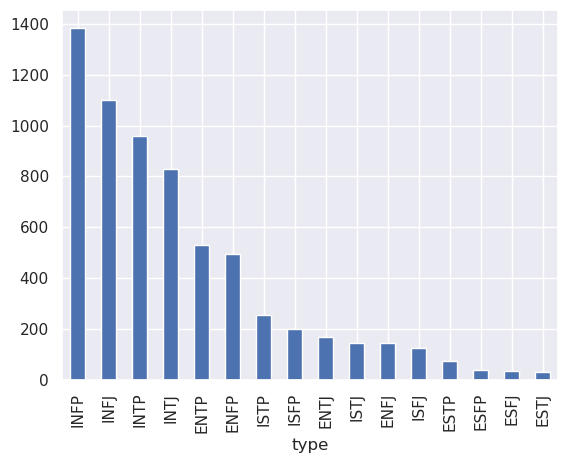

In [8]:
# Visualise the distribution of MBTI personality types
mbti['type'].value_counts().plot(kind = 'bar')
plt.show()

It looks like we have very few samples for the 'ES' types. Maybe because they are out in the real world, not sitting behind a computer screen! :)   
   
Let's increase the size of the dataset by separating each of the 50 posts in the `posts` column of each row into its own row. 

In [9]:
# Separate each post in the 'posts' column into its own row
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [10]:
# How many rows do we have now?
all_mbti.shape

(316548, 2)

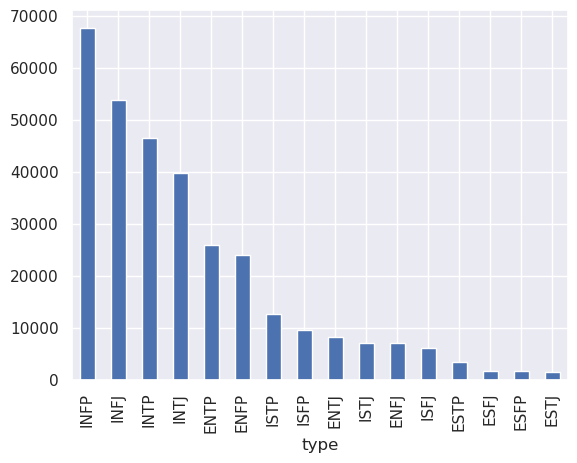

In [11]:
all_mbti['type'].value_counts().plot(kind = 'bar')
plt.show()

Although the proportions of the classes remain consistent, we have significantly increased the number of samples for the 'ES' personality types by separating each post into its own row.

## Text cleaning

### Removing noise

In text analytics, removing noise (i.e. unnecessary information) is a key part of getting the data into a usable format.  Some techniques are standard, but your own unique dataset will require some creative thinking on your part.

For the MBTI dataset, we will be doing the following:
* Remove the web-urls.
* Make all the text lowercase.
* Remove punctuation.

**[Regular expressions](https://www.regular-expressions.info/)** can be very useful for extracting information from text.  If you feel brave, go teach yourself all about it. If not, just follow along.  This next step effectively removes all websites and replaces them with the text `'web-url'`.

In [12]:

# Replace URLs in the 'post' column with a placeholder string
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_mbti['post'] = all_mbti['post'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [13]:
all_mbti.head()

,type,post
0,INFJ,'url-web
1,INFJ,url-web
2,INFJ,enfp and intj moments url-web sportscenter n...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,url-web url-web On repeat for most of today.


**Food for thought...** There seem to be a lot of YouTube and other links embedded.  Maybe you can think of ways to collect even more information from these links. How about page titles and names of YouTube videos?

### Remove punctuation

First we make all the text lowercase to remove some noise from capitalisation.

In [14]:
all_mbti['post'] = all_mbti['post'].str.lower()

Now let's remove the punctuation using the `string` import.

In [15]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [17]:
all_mbti['post'] = all_mbti['post'].apply(remove_punctuation)
all_mbti['post'].iloc[268558]

'just when i think i’ve lost you just when i’m so tired i toss away the fight and say “i’ll just embrace my demons then… ‘cause you feel so far away and i’ll never be your angel” —that’s when'

Looks like some punctuation snuck in! See if you can figure out why. Hint: It has something to do with the standard encoding on text files in Python.

### Tokenisation

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words" (see the [Stanford Tokeniser](https://nlp.stanford.edu/software/tokenizer.html)). We will use tokenisers to clean up the data, making it ready for analysis.

In [18]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [21]:
word_tokenize('A tokenizer divides text into a sequence of tokens, which roughly correspond to "words".')

['A',
 'tokenizer',
 'divides',
 'text',
 'into',
 'a',
 'sequence',
 'of',
 'tokens',
 ',',
 'which',
 'roughly',
 'correspond',
 'to',
 '``',
 'words',
 "''",
 '.']

We will use the TreeBankWordTokenizer since it is MUCH quicker than the word_tokenize function.

In [22]:
# Tokenise the text using the TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
all_mbti['tokens'] = all_mbti['post'].apply(tokeniser.tokenize)

In [23]:
all_mbti['tokens'].iloc[55555]

['i',
 'find',
 'all',
 'of',
 'you',
 'to',
 'be',
 'extremely',
 'humorous',
 'now',
 'to',
 'find',
 'other',
 'specimen',
 'to',
 'observe']

### Stemming

Stemming is the process of transforming to the root word. It uses an algorithm that removes
common word endings from English words, such as “ly”, “es”, “ed”, and “s”. 

For instance, suppose you're conducting an analysis and you wish to treat words like "carefully", "cared", "cares", and "caringly" as a single entity, "care", rather than separate words. There are three widely used stemming algorithms, namely:
* Porter
* Lancaster
* Snowball

Out of these three, we will be using the `SnowballStemmer`.

In [24]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [25]:
words = 'caring cares cared caringly carefully'

In [26]:
# find the stem of each word in words
stemmer = SnowballStemmer('english')
for word in words.split():
    print(stemmer.stem(word))

care
care
care
care
care


Now let us stem all of the words in the MBTI DataFrame.

In [27]:
def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [28]:
all_mbti['stem'] = all_mbti['tokens'].apply(mbti_stemmer, args=(stemmer, ))

Print the results of the stemmer to see what we have done.

In [29]:
for i, t in enumerate(all_mbti.iloc[268702]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, all_mbti.iloc[268702]['stem'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angri     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regular   
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admin     
are                  --> are       
screwing             --> screw     
everything           --> everyth   
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

### Lemmatization

Lemmatization is another text normalisation technique that aims to reduce words to their base or dictionary form, known as lemmas. Unlike stemming, which simply removes word endings, lemmatization considers the context of the word and morphological analysis to accurately derive the lemma. This ensures that the resulting lemma is a valid word found in the dictionary, preserving the semantic meaning of the word in different contexts. While lemmatization is more computationally intensive compared to stemming, it offers higher accuracy in maintaining the integrity of words.

Sometimes, we may end up with a word that closely resembles the original, while in other cases, we might get a word that is entirely different. Let's explore some examples to illustrate this.

In [30]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("ran",'v'))

[nltk_data] Downloading package wordnet to /home/ahmed/nltk_data...


cat
cactus
goose
rock
python
good
best
run
run


Let's lemmatize all of the words in the MBTI DataFrame.

In [31]:
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [32]:
all_mbti['lemma'] = all_mbti['tokens'].apply(mbti_lemma, args=(lemmatizer, ))

Now we will print out the results of the lemmatization to see what we have done.

In [33]:
for i, t in enumerate(all_mbti.iloc[268702]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, all_mbti.iloc[268702]['lemma'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angry     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regularly 
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admins    
are                  --> are       
screwing             --> screwing  
everything           --> everything
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

### Stop words

Stop words are words that do not contain important significance to be used in search queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information. `nltk` has a corpus of stop words. Let's print out the stop words for English.

In [34]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
sorted(stopwords.words('english'))[0:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

The following function removes all of the English stop words from the input text.

In [36]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

To remove stop words, simply uncomment and execute the following cell! Please note, however, that this process may take a while due to the computational load imposed by the Pandas apply function.

In [ ]:
# all_mbti['stem'] = all_mbti['tokens'].apply(remove_stop_words)
#all_mbti['stem']

# Conclusion


In conclusion, mastering text-cleaning techniques and feature extraction in natural language processing (NLP) is crucial for effectively preparing unstructured text data for analysis and machine learning tasks. Through methods such as removing noise like URLs, converting text to lowercase, removing punctuation, tokenisation, stemming, lemmatization, and stop word removal, we can enhance the quality of text data and extract meaningful features for further analysis. These techniques play a fundamental role in NLP pipelines, enabling the development of robust models and gaining valuable insights from textual data.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>